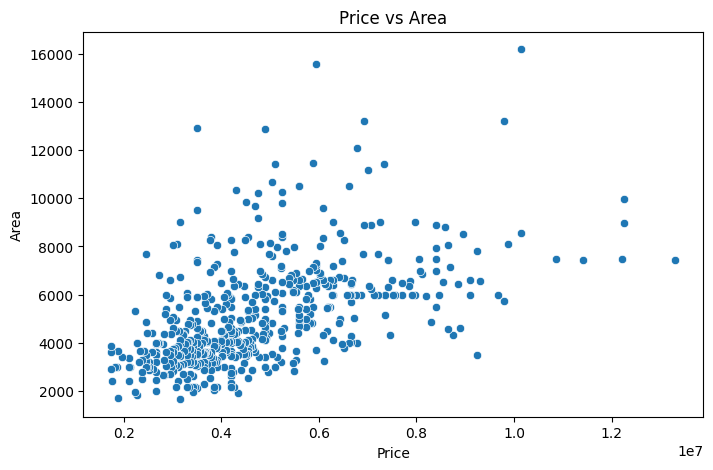

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'G:\AI\AI\Homework AI\lesson-3\data\housing.csv')
#1
# Visualizing the relationship between TV advertising and sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x='price', y='area', data=data)
plt.title('Price vs Area')
plt.xlabel('Price')
plt.ylabel('Area')
plt.show()

In [6]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
from sklearn.model_selection import train_test_split
X, y = data[['price']], data['area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

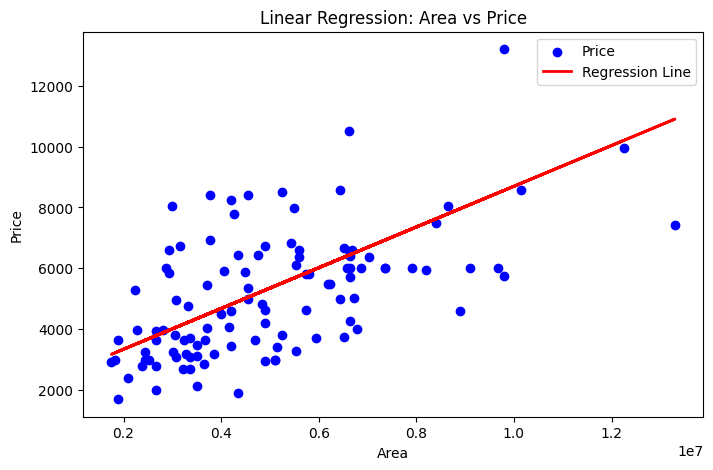

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Plot the regression line along with the data points
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Price')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mse

2935124.1250945292

In [11]:
r2 = r2_score(y_test, y_pred)
r2

0.2863227465807431

Mean Squared Error (MSE): 2750040479309.052
R-squared (R2) score: 0.45592991188724463


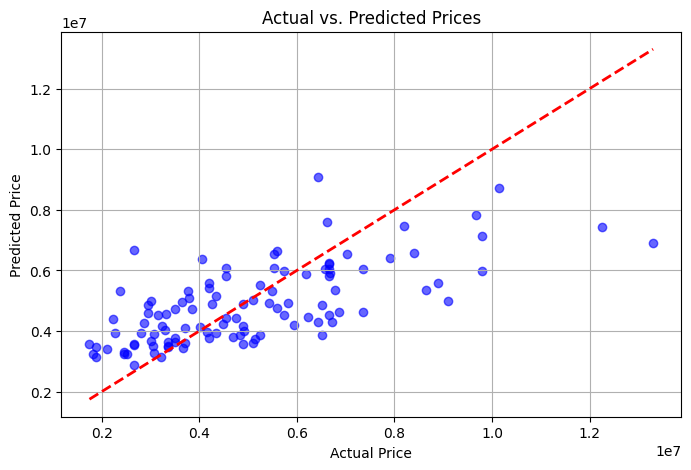

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
df = pd.read_csv(r'G:\AI\AI\Homework AI\lesson-3\data\housing.csv')

# Define the independent (X) and dependent (y) variables
# We now predict 'price' using 'area', 'bedrooms', and 'bathrooms'
X = df[['area', 'bedrooms', 'bathrooms']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) score: {r2}")

# Plotting predicted prices against actual prices to evaluate model performance
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.savefig('corrected_linear_regression_plot.png')